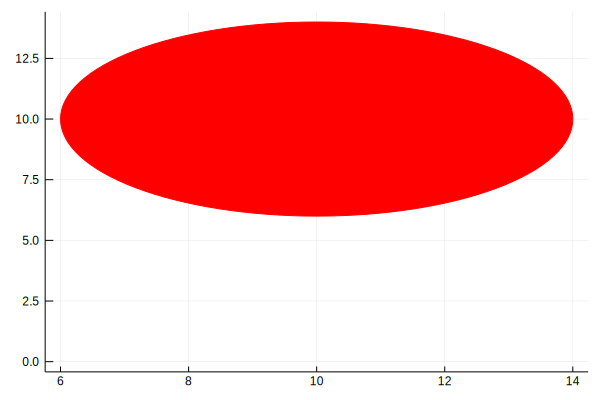

In [2]:
using Plots
#KEEPING THIS AS AN EXAMPLE ON HOW TO USE KWARGS BUT NOT USING IT ANYMORE
function makeCircle(r,center; kwargs...)
    xOffset=center[1]
    yOffset=center[2]
    xVals=[r*cos(i)+xOffset for i=0:(pi/64):(2*pi)]
    yVals=[r*sin(i)+yOffset for i=0:(pi/64):(2*pi)]
    return plot(xVals,yVals,fill=true; kwargs...)
end

test1=makeCircle(4,[10,10],color=:red,label="")
#plot([sin(i) for i=0:(pi/64):(2*pi)],[cos(i) for i=0:(pi/64):(2*pi)],fill=true,size=(500,500))

In [1]:
function makeCircleVals(r,center=[0,0])
    xOffset=center[1]
    yOffset=center[2]
    xVals=[r*cos(i)+xOffset for i=0:(pi/64):(2*pi)]
    yVals=[r*sin(i)+yOffset for i=0:(pi/64):(2*pi)]
    return xVals,yVals
end

circleX,circleY=makeCircleVals(10)

([10.0, 9.98795, 9.95185, 9.89177, 9.80785, 9.70031, 9.5694, 9.41544, 9.2388, 9.03989  …  9.03989, 9.2388, 9.41544, 9.5694, 9.70031, 9.80785, 9.89177, 9.95185, 9.98795, 10.0], [0.0, 0.490677, 0.980171, 1.4673, 1.9509, 2.4298, 2.90285, 3.3689, 3.82683, 4.27555  …  -4.27555, -3.82683, -3.3689, -2.90285, -2.4298, -1.9509, -1.4673, -0.980171, -0.490677, -2.44929e-15])

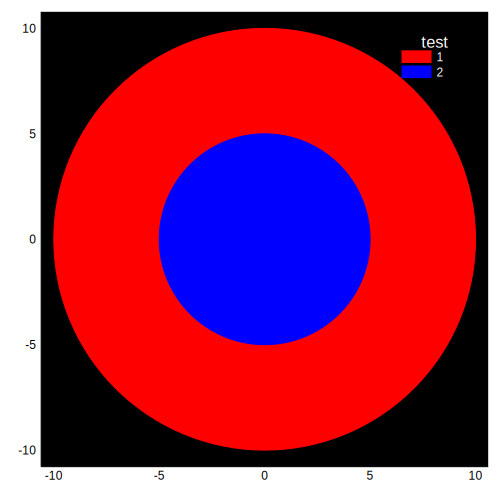

In [5]:
gr(legendfontcolor = plot_color(:white)) #plot arg broken right now in Julia
plot(circleX,circleY,label="1",color=:red,fill=true)
c2X,c2Y=makeCircleVals(5)
plot!(c2X,c2Y,label="2",color=:blue,fill=true,size=(500,500))
plot!(background_color=:black,background_color_legend=:black,background_color_outside=:white,aspect_ratio=:equal,legendtitlefontcolor=:white,legendtitle="test")
plot!(background_color_legend=:transparent,foreground_color_legend=:transparent)


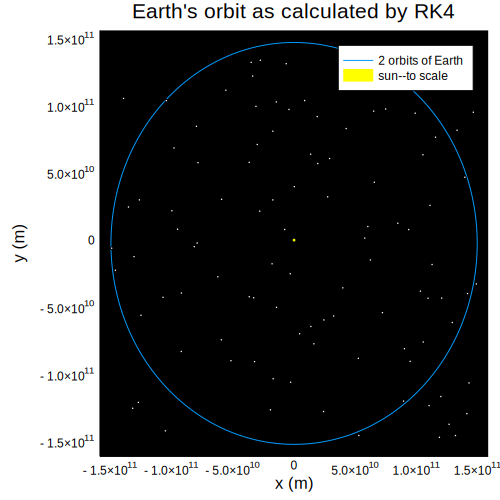

In [42]:
using Random

function dR(r,t)
    G=6.67408313131313e-11# Nm^2/kg^2 
    M=1.9891e30 #kg
    constant=G*M
    rMag=sqrt(r[1]^2+r[2]^2) 

    A=r[3] #dx/dt
    B=r[4] #dy/dt
  
    dA=-(constant/(rMag^3))*r[1] #d^2x/dt^2
    dB=-(constant/(rMag^3))*r[2] #d^2y/dt^2
   
    return [A,B,dA,dB]
end

x0=0.0
y0=1.471e11 #m
vX0=3.0287e4 #m/s
vY0=0.0
r0=[x0,y0,vX0,vY0]
start=0
yearSeconds=31536000 
endT=yearSeconds*2
numSteps=10000
stepSize=(endT-start)/numSteps
t=range(start,stop=endT,length=numSteps)

x=[]
y=[]
r=[]

for i in t
    push!(x,r0[1])
    push!(y,r0[2])
    k1=stepSize*dR(r0,t)
    k2=stepSize*dR(r0.+0.5.*k1,t.+0.5.*stepSize)
    k3=stepSize*dR(r0.+0.5.*k2,t.+0.5.*stepSize)
    k4=stepSize*dR(r0.+k3,t.+stepSize)
    r0+=(k1.+2.0*k2.+2.0.*k3.+k4)./6
end

for i=1:length(x)
    xi=x[i]
    yi=y[i]
    push!(r,sqrt(xi^2+yi^2))
end
    
    
rSun=6.957e8 #m
sun=makeCircleVals(rSun)
plot(x,y,label="2 orbits of Earth")
plot!(sun[1],sun[2],color=:yellow,fill=true,label="sun--to scale")
plot!(xlabel="x (m)",ylabel="y (m)",title="Earth's orbit as calculated by RK4")

#adding fake stars
starsX=[]
starsY=[]
for i=1:100
    num=rand(-1.5e11:1.5e11,2)
    push!(starsX,num[1])
    push!(starsY,num[2])
end

scatter!(starsX,starsY,markercolor=:white,markersize=:1,label="")
plot!(background_color=:black,background_color_legend=:white,background_color_outside=:white,size=(500,500))


In [1]:
function dR(r,m)
    G=6.67408313131313e-11# Nm^2/kg^2 
    M1,M2,M3=m[1],m[2],m[3]
    x1,x2,x3=r[1],r[3],r[5]
    y1,y2,y3=r[2],r[4],r[6]

    c1,c2,c3=G*M1,G*M2,G*M3
    r1_2=sqrt((x1-x2)^2+(y1-y2)^2) #distance from 1->2
    r1_3=sqrt((x1-x3)^2+(y1-y3)^2) #distance from 1->3
    r2_3=sqrt((x2-x3)^2+(y2-y3)^2) #distance from 2->3
    
    v1X,v2X,v3X=r[7],r[9],r[11]
    v1Y,v2Y,v3Y=r[8],r[10],r[12]

    dx1=-(c2*(x1-x2)/(r1_2^3))-(c3*(x1-x3)/(r1_3^3)) #d^2x/dt^2 for 1 (2 interactions)
    dx2=-(c1*(x2-x1)/(r1_2^3))-(c3*(x2-x3)/(r2_3^3)) #d^2x/dt^2 for 2
    dx3=-(c1*(x3-x1)/(r1_3^3))-(c2*(x3-x2)/(r2_3^3)) #d^2x/dt^2 for 3
    dy1=-(c2*(y1-y2)/(r1_2^3))-(c3*(y1-y3)/(r1_3^3)) #d^2y/dt^2 for 1
    dy2=-(c1*(y2-y1)/(r1_2^3))-(c3*(y2-y3)/(r2_3^3)) #d^2y/dt^2 for 2
    dy3=-(c1*(y3-y1)/(r1_3^3))-(c2*(y3-y2)/(r2_3^3)) #d^2y/dt^2 for 3

    return [v1X,v1Y,v2X,v2Y,v3X,v3Y,dx1,dy1,dx2,dy2,dx3,dy3]
end

dR (generic function with 1 method)

In [77]:
#moon initial conditions
mx0=0.0
my0=3.85e8 #m
mvX0=1018.0 #m/s
mvY0=0.0
MM=7.342e22 #kg

#rocket initial conditions
rx0=0.0
ry0=3e8 #m
rvX0=1000.0#m/s
rvY0=0.0
MR=3e6 #kg

#Earth initial conditions
eX0=0.0
eY0=0.0
evX0=0.0
evY0=0.0
ME=5.9736e24 #kg

r0=[rx0,ry0,mx0,my0,eX0,eY0,rvX0,rvY0,mvX0,mvY0,evX0,evY0]
m=[MR,MM,ME]

xR=[]
yR=[]
xM=[]
yM=[]
xE=[]
yE=[]

start=0
daySeconds=60.0*60.0*24
endT=daySeconds*28
numSteps=10000
stepSize=(endT-start)/numSteps
t=range(start,stop=endT,length=numSteps)

for i in t
    push!(xR,r0[1])
    push!(yR,r0[2])
    push!(xM,r0[3])
    push!(yM,r0[4])
    push!(xE,r0[5])
    push!(yE,r0[6])

    k1=stepSize*dR(r0,t,m)
    k2=stepSize*dR(r0.+0.5.*k1,m)
    k3=stepSize*dR(r0.+0.5.*k2,m)
    k4=stepSize*dR(r0.+k3,m)
    r0+=(k1.+2.0*k2.+2.0.*k3.+k4)./6
end

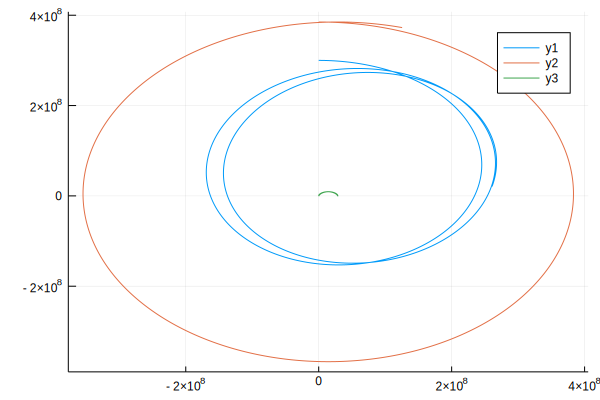

In [78]:
plot(xR,yR)
plot!(xM,yM)
plot!(xE,yE)

In [69]:
#body1 initial conditions
x0_1=0.0
y0_1=3.85e8 #m
vX0_1=1018.0 #m/s
vY0_1=0.0
M1=7.342e22 #kg

#body2 initial conditions
x0_2=0.0
y0_2=3.8e7 #m
vX0_2=2000.0#m/s
vY0_2=0.0
M2=3e6 #kg

#body3 initial conditions
x0_3=0.0
y0_3=0.0
vX0_3=0.0
vY0_3=0.0
M3=5.9736e24 #kg

r=[x0_1,y0_1,x0_2,y0_2,x0_3,y0_3,vX0_1,vY0_1,vX0_2,vY0_2,vX0_3,vY0_3]
m=[M1,M2,M3]

x1=[]
y1=[]
x2=[]
y2=[]
x3=[]
y3=[]

start=0
daySeconds=60.0*60.0*24
endT=daySeconds*28
numSteps=10000
stepSize=(endT-start)/numSteps
t=range(start,stop=endT,length=numSteps)

for i in t
    push!(x1,r[1])
    push!(y1,r[2])
    push!(x2,r[3])
    push!(y2,r[4])
    push!(x3,r[5])
    push!(y3,r[6])

    k1=stepSize*dR(r,t,m)
    k2=stepSize*dR(r.+0.5.*k1,t.+0.5.*stepSize,m)
    k3=stepSize*dR(r.+0.5.*k2,t.+0.5.*stepSize,m)
    k4=stepSize*dR(r.+k3,t.+stepSize,m)
    r+=(k1.+2.0*k2.+2.0.*k3.+k4)./6
end

In [79]:
#notes:
#for stars, R=M^0.8 (main sequence, rough estimate, both in solar units)
#stop condition: time based and separation based? ie if separation farther than x AU or if touching stop
#fake stars regenerated each frame because frame size will be changing 
#mass range: 0.1-150 (solar units)
#initial separation of 1-1000 AU? Gives box size ~700x700 AU (diag 1000 AU)
#initial velocities? could estimate from requirements for stable 2-body orbits or just guess? 
#how to distribute velocity along x-y? probably easiest to just do random assignment within range (at first)


In [2]:
function initCondGen()
    m=rand(1:1500,3)./10 #3 random masses between 0.1 and 150 solar masses
    rad=m.^0.8 #3 radii based on masses in solar units
    m=m.*2e30 #convert to SI kg
    rad=rad.*7e8 #convert to SI m
    pos1=rand(-35:35,2) #random initial coordinates x & y for first body, AU
    function genPos2(pos1)
        accept2=false
        while accept2==false
            pos2=rand(-35:35,2) #random initial coordinates for second body, AU
            dist21=sqrt((pos1[1]-pos2[1])^2+(pos1[2]-pos2[1])^2)
            if (dist21*1.5e11)>(rad[1]+rad[2]) #they aren't touching
                accept2=true
                return pos2
            end
        end
    end
    pos2=genPos2(pos1)
    function genPos3(pos1,pos2)
        accept3=false
        while accept3==false
            pos3=rand(-35:35,2) #random initial coordinates for third body, AU
            dist31=sqrt((pos1[1]-pos3[1])^2+(pos1[2]-pos3[1])^2)
            dist32=sqrt((pos2[1]-pos3[1])^2+(pos2[2]-pos3[1])^2)
            if (dist31*1.5e11)>(rad[1]+rad[3]) && (dist32*1.5e11)>(rad[2]+rad[3]) #3rd isn't touching either
                accept3=true
                return pos3
            end
        end
    end
    pos3=genPos3(pos1,pos2)
    pos=[pos1[1],pos1[2],pos2[1],pos2[2],pos3[1],pos3[2]].*1.5e11 #convert accepted positions to SI, m
    v=rand(-7e3:7e3,6) #random x & y velocities with mag between -10 & 10 km/s, totally arbitrary...
    #r=[x1,y1,x2,y2,x3,y3,v1x,v1y,v2x,v2y,v3x,v3y]
    r=[pos[1],pos[2],pos[3],pos[4],pos[5],pos[6],v[1],v[2],v[3],v[4],v[5],v[6]]
    return r, rad, m
end
    

initCondGen (generic function with 1 method)

In [4]:
using Random

In [19]:
rand(1:1500,1)./10

1-element Array{Float64,1}:
 31.4

In [5]:
r,rad,m=initCondGen()

([-4.65e12, -1.8e12, 1.5e11, -1.95e12, 4.5e11, -2.85e12, -2738.0, -324.0, -5975.0, 81.0, -952.0, -4901.0], [2.06138e10, 1.00077e10, 2.89547e10], [1.372e32, 5.56e31, 2.098e32])

In [3]:
function getColors(m,c)
    #c=[:red,:yellow,:orange] #red=biggest yellow=smallest
    maxM=maximum(m)
    minM=minimum(m)
    colors=[:blue,:blue,:blue] #testing
    if m[1]==maxM
        colors[1]=c[1] 
        if m[2]==minM
            colors[2]=c[3]
            colors[3]=c[2]
        else
            colors[3]=c[3]
            colors[2]=c[2]
        end
    elseif m[2]==maxM
        colors[2]=c[1]
        if m[1]==minM
            colors[1]=c[3]
            colors[3]=c[2]
        else
            colors[3]=c[3]
            colors[1]=c[2]
        end
    else
        colors[3]=c[1]
        if m[1]==minM
            colors[1]=c[3]
            colors[2]=c[2]
        else
            colors[2]=c[3]
            colors[1]=c[2]
        end
    end
    return colors
end

getColors (generic function with 1 method)

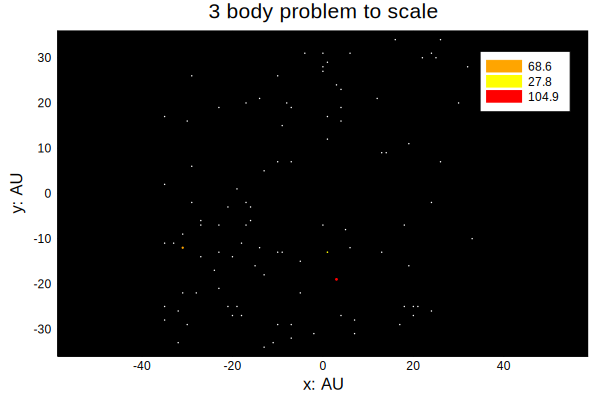

In [8]:
#plotting example for circles, in AU, this is like 1 frame of animation
using Printf, Plots
c=[:red,:orange,:yellow]

star1=makeCircleVals(rad[1],[r[1],r[2]])
star2=makeCircleVals(rad[2],[r[3],r[4]])
star3=makeCircleVals(rad[3],[r[5],r[6]])
plot(star1[1]./1.5e11,star1[2]./1.5e11,label="$(@sprintf("%.1f", m[1]./2e30))",color=colors[1],fill=true)
plot!(star2[1]./1.5e11,star2[2]./1.5e11,label="$(@sprintf("%.1f", m[2]./2e30))",color=colors[2],fill=true)
plot!(star3[1]./1.5e11,star3[2]./1.5e11,label="$(@sprintf("%.1f", m[3]./2e30))",color=colors[3],fill=true)
scatter!(starsX,starsY,markercolor=:white,markersize=:1,label="") #fake background stars
plot!(background_color=:black,background_color_legend=:white,background_color_outside=:white,aspect_ratio=:equal)
plot!(xlabel="x: AU",ylabel="y: AU",title="3 body problem to scale",legend=:topright)

In [81]:
colors=[:red,:yellow,:blue]

3-element Array{Symbol,1}:
 :red   
 :yellow
 :blue  

In [13]:
function gen3Body(stopCond=[10,100],numSteps=10000) #default stop conditions of 10 yrs and 100 AU sep
    tStop=stopCond[1]*365*24*3600 #convert to SI s
    sepStop=stopCond[2]*1.5e11 #convert to SI m
    stop=false
    currentT=0
    t=range(0,stop=tStop,length=(numSteps+1)) #+1 because I don't want 0 to count
    stepSize=tStop/numSteps
    x1=zeros(length(t))
    y1=zeros(length(t))
    x2=zeros(length(t))
    y2=zeros(length(t))
    x3=zeros(length(t))
    y3=zeros(length(t))
    r,rad,m=initCondGen()
    min12=rad[1]+rad[2]
    min13=rad[1]+rad[3]
    min23=rad[2]+rad[3]
    i=1
    stopT=maximum(t)
    while stop==false
        if currentT==stopT || currentT>stopT #in case of rounding error or something
            stop=true
        elseif i>numSteps #inf loop failsafe
            stop=true
            println("error: shouldn't have gotten here")
        else
            x1[i]=r[1]
            y1[i]=r[2]
            x2[i]=r[3]
            y2[i]=r[4]
            x3[i]=r[5]
            y3[i]=r[6]

            k1=stepSize*dR(r,m)
            k2=stepSize*dR(r.+0.5.*k1,m)
            k3=stepSize*dR(r.+0.5.*k2,m)
            k4=stepSize*dR(r.+k3,m)
            r+=(k1.+2.0*k2.+2.0.*k3.+k4)./6

            sep12=sqrt((x1[i]-x2[i])^2+(y1[i]-y2[i])^2)
            sep13=sqrt((x1[i]-x3[i])^2+(y1[i]-y3[i])^2)
            sep23=sqrt((x3[i]-x2[i])^2+(y3[i]-y2[i])^2)
            if sep12<min12 || sep13<min13 || sep23<min23
                stop=true
                t=range(0,stop=currentT,length=i) #t should match pos vectors 
                x1=x1[1:i] #don't want trailing zeros
                y1=y1[1:i]
                x2=x2[1:i]
                y2=y2[1:i]
                x3=x3[1:i]
                y3=y3[1:i]
            end
            i+=1
            currentT+=stepSize
        end
    end
    return [x1,y1,x2,y2,x3,y3], t, m, rad
end

gen3Body (generic function with 3 methods)

In [10]:
#plotData,t,m,rad=gen3Body()
function getInteresting3Body(minTime=0) #in years
    yearSec=365*24*3600
    interesting=false
    i=1
    while interesting==false
        plotData,t,m,rad=gen3Body()
        if (maximum(t)/yearSec)>minTime
            println(maximum(t)/yearSec)
            return plotData,t,m,rad
            interesting=true
        elseif i>10 #computationally expensive so don't want to go forever
            interesting=true 
            return plotData,t,m,rad
        end
        i+=1
    end
end
#plotData,t,m,rad=getInteresting3Body()

getInteresting3Body (generic function with 2 methods)

In [199]:
numSteps=10000
currentT=0
t=range(0,stop=10*365*24*3600,length=(numSteps+1))
stepSize=10*365*24*3600/numSteps

31536.0

In [108]:
delta=t[2]-t[1]

31536.0

In [11]:
function getLims(pos,padding)
    x=[pos[1],pos[3],pos[5]]
    xMin=minimum(x)
    xMax=maximum(x)
    dx=xMax-xMin
    y=[pos[2],pos[4],pos[6]]
    yMin=minimum(y)
    yMax=maximum(y)
    dy=yMax-yMin
    if dx>dy
        #use x for square
        xlims=[xMin-padding,xMax+padding]
        ylims=[yMin-padding,yMin+dx+padding]
    else
        #use y for square
        xlims=[xMin-padding,xMin+dy+padding]
        ylims=[yMin-padding,yMax+padding]
    end
    return xlims,ylims
end

getLims (generic function with 1 method)

10.0


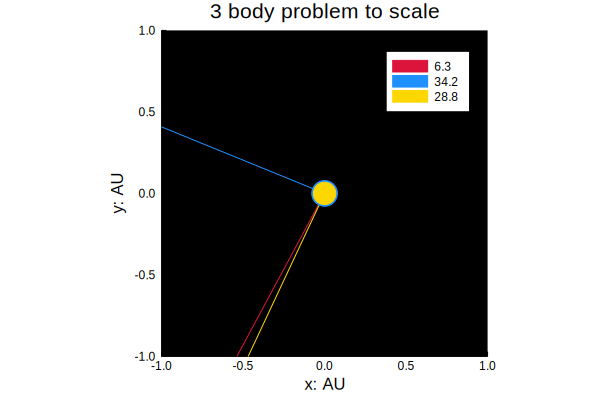

In [33]:
using Plots, Printf
plotData,t,m,rad=getInteresting3Body(5)
c=[:DodgerBlue,:Gold,:Crimson]
colors=getColors(m,c)
colors=getColors(m,c)
#adding fake stars
numStars=1000
starsX=zeros(numStars)
starsY=zeros(numStars)
for i=1:numStars
    num=rand(-100:100,2) #box size is 70 AU
    starsX[i]=num[1]
    starsY[i]=num[2]
end
pos=[plotData[1][end],plotData[2][end],plotData[3][end],plotData[4][end],plotData[5][end],plotData[6][end]]
limx,limy=getLims(pos./1.5e11,1)
plot(plotData[1]./1.5e11,plotData[2]./1.5e11,label="",linecolor=colors[1])
plot!(plotData[3]./1.5e11,plotData[4]./1.5e11,label="",linecolor=colors[2])
plot!(plotData[5]./1.5e11,plotData[6]./1.5e11,label="",linecolor=colors[3])
star1=makeCircleVals(rad[1],[plotData[1][end],plotData[2][end]])
star2=makeCircleVals(rad[2],[plotData[3][end],plotData[4][end]])
star3=makeCircleVals(rad[3],[plotData[5][end],plotData[6][end]])
plot!(star1[1]./1.5e11,star1[2]./1.5e11,label="$(@sprintf("%.1f", m[1]./2e30))",color=colors[1],fill=true)
plot!(star2[1]./1.5e11,star2[2]./1.5e11,label="$(@sprintf("%.1f", m[2]./2e30))",color=colors[2],fill=true)
plot!(star3[1]./1.5e11,star3[2]./1.5e11,label="$(@sprintf("%.1f", m[3]./2e30))",color=colors[3],fill=true)
scatter!(starsX,starsY,markercolor=:white,markersize=:1,label="") #fake background stars
plot!(background_color=:black,background_color_legend=:white,background_color_outside=:white,aspect_ratio=:equal)
plot!(xlabel="x: AU",ylabel="y: AU",title="3 body problem to scale",legend=:topright,xlims=(limx[1],limx[2]),ylims=(limy[1],limy[2]))

In [27]:
maximum(t)/365/24/3600

10.0

In [35]:
i=201
print("$(@sprintf("%.2f",i/length(t)*100)) % complete\r")

In [37]:
#making animation
using ProgressMeter,Formatting

plotData,t,m,rad=getInteresting3Body(5)
c=[:red,:orange,:yellow]
colors=getColors(m,c)

threeBodyAnim=@animate for i=1:length(t)
    print("$(@sprintf("%.2f",i/length(t)*100)) % complete\r") #output percent tracker
    pos=[plotData[1][i],plotData[2][i],plotData[3][i],plotData[4][i],plotData[5][i],plotData[6][i]] #current pos
    limx,limy=getLims(pos./1.5e11,1) #convert to AU, 1 AU padding
    plot(plotData[1][1:i]./1.5e11,plotData[2][1:i]./1.5e11,label="",linecolor=colors[1])
    plot!(plotData[3][1:i]./1.5e11,plotData[4][1:i]./1.5e11,label="",linecolor=colors[2])
    plot!(plotData[5][1:i]./1.5e11,plotData[6][1:i]./1.5e11,label="",linecolor=colors[3])
    star1=makeCircleVals(rad[1],[plotData[1][i],plotData[2][i]])
    star2=makeCircleVals(rad[2],[plotData[3][i],plotData[4][i]])
    star3=makeCircleVals(rad[3],[plotData[5][i],plotData[6][i]])
    plot!(star1[1]./1.5e11,star1[2]./1.5e11,label="$(@sprintf("%.1f", m[1]./2e30))",color=colors[1],fill=true)
    plot!(star2[1]./1.5e11,star2[2]./1.5e11,label="$(@sprintf("%.1f", m[2]./2e30))",color=colors[2],fill=true)
    plot!(star3[1]./1.5e11,star3[2]./1.5e11,label="$(@sprintf("%.1f", m[3]./2e30))",color=colors[3],fill=true)
    plot!(background_color=:black,background_color_legend=:white,background_color_outside=:white,aspect_ratio=:equal)
    plot!(xlabel="x: AU",ylabel="y: AU",title="3 body problem to scale\nt: $(@sprintf("%0.2f",t[i]/365/24/3600)) yrs after start",
    legend=:best,xlims=(limx[1],limx[2]),ylims=(limy[1],limy[2]),grid=false,titlefontsize=42,size=(2000,2000))
    end every 5

5.589


Animation("/tmp/tmpTCwj5Z", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "001109.png", "001110.png", "001111.png", "001112.png", "001113.png", "001114.png", "001115.png", "001116.png", "001117.png", "001118.png"])

In [38]:
gif(threeBodyAnim,"test3bodyfps30.mp4",fps=30)

┌ Info: Saved animation to 
│   fn = /home/kirk/Documents/test3bodyfps30.mp4
└ @ Plots /home/kirk/.julia/packages/Plots/h3o4c/src/animation.jl:95


Plots.AnimatedGif("/home/kirk/Documents/test3bodyfps30.mp4")